In [2]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib notebook
import matplotlib.dates as dates
import datetime as dt


In [3]:
df = pd.read_csv('Michigan Weather.csv')

df['date'] = pd.to_datetime(df['DATE'])
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
df = df[df['year']==2019]

dfw = df[df['NAME'] == 'WHITMORE LAKE 1 NW, MI US']
dfw_snow = dfw.groupby('month')['SNOW'].sum()
dfw_TMAX = dfw.groupby('month')['TMAX'].max()
dfw_TMIN = dfw.groupby('month')['TMIN'].min()

dff = df[df['NAME'] == 'FARMINGTON, MI US']
dff_snow = dff.groupby('month')['SNOW'].sum()
dff_TMAX = dff.groupby('month')['TMAX'].max()
dff_TMIN = dff.groupby('month')['TMIN'].min()


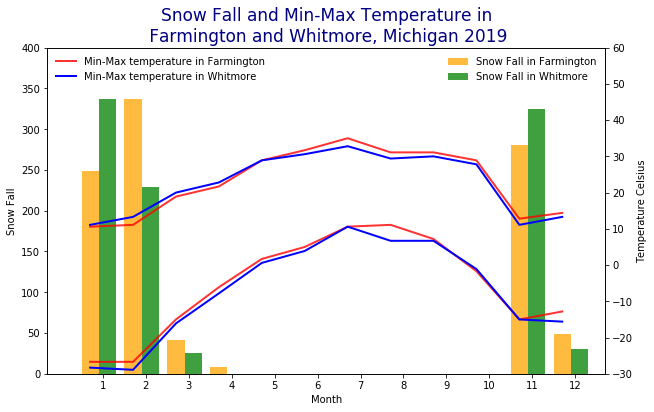

In [4]:
plt.figure(figsize=(10,6))

time_range = np.arange(1, 13)

plt.bar(time_range, dff_snow, width = 0.4, color = 'orange', alpha = 0.75)
plt.bar(time_range+0.4, dfw_snow, width = 0.4, color = 'green', alpha = 0.75)


ax1 = plt.gca()
ax1.set_ylabel('Snow Fall')
ax1.set_xlabel('Month')
ax1.legend(['Snow Fall in Farmington', 'Snow Fall in Whitmore'], loc=1,frameon=False)
ax1.axis([0,13,0,400])

ax2 = ax1.twinx()
ax2.plot(time_range, dff_TMAX, color = 'red', linewidth = 2, alpha = 0.8)
ax2.plot(time_range, dfw_TMAX, color = 'blue', linewidth = 2)
ax2.plot(time_range, dff_TMIN, color = 'red', linewidth = 2, alpha = 0.8)
ax2.plot(time_range, dfw_TMIN, color = 'blue', linewidth = 2)
ax2.set_ylabel('Temperature Celsius')
ax2.axis([0,13,-30,60])

ax2.legend(['Min-Max temperature in Farmington', 'Min-Max temperature in Whitmore'],loc=2,frameon=False)

plt.title('Snow Fall and Min-Max Temperature in\n Farmington and Whitmore, Michigan 2019', c = 'navy', fontsize = 17)
plt.xticks(time_range + 0.3, time_range, alpha=0.8)
plt.savefig('Asignment4')

